# Cálculo Simbólico en Python

*Matrices y Machine Learning: Sesión $12$*

## 1. Introducción al Cálculo Símbólico en Python

El objeto matemático más común en las aplicaciones al mundo real son, sin lugar a duda, las funciones de una o varias variables reales. El problema es que estos objetos son, por naturaleza, infinitos. Una función es, de cierta forma, solo específicada completamente si conocemos cada uno de sus valores $f(x)$ para cada uno de los infinitos $x \in \mathbb{R}$ que podríamos reemplazar en ella. Entonces surge un problema bastante grande frente a nosotros ¿Cómo podemos manejar un objeto tan fundamental para el mundo real si solo tenemos finita memoria y tiempo para ello?

Si bien -y por buenas razones- la tarea más común de los lenguajes de programación es el cálculo _numérico_, aquel en el que aproximamos funciones por objetos finitos, este tiene el problema de que es inherentemente aproximado. Veamos un ejemplo.

El siguiente código tiene el trabajo simple de graficar una función:

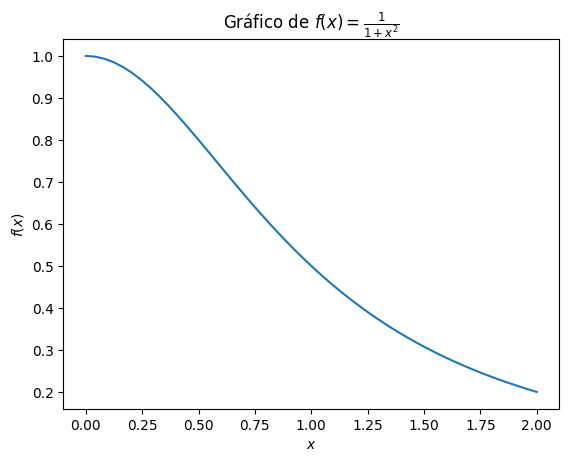

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: 1/(1 + x**2)
x = np.linspace(0, 2) # [0, 2]
y = f(x)

plt.plot(x, y)
plt.title("Gráfico de $f(x) = \\frac{1}{1+x^2}$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Al principio, pareciera ser que el objeto que estamos viendo es bastante _continuo_. Eso es hasta que miramos por debajo del código y nos preguntamos quién es nuestro $x$:

In [4]:
x

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

Vemos que su verdadera identidad es la de una gran lista que en cierta forma _aproxima_ el intervalo $[0, 2]$. Lo que hace el gráfico por defecto es rellenar los valores con líneas rectas, pero si quitamos este comportamiento, obtenemos un gráfico más honesto:

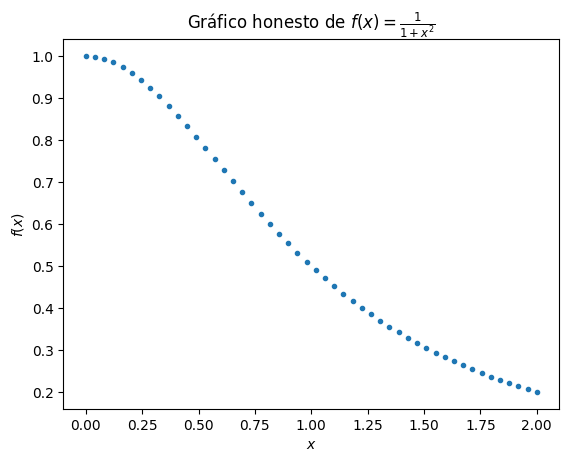

In [5]:
plt.plot(x, y, ".")
plt.title("Gráfico honesto de $f(x) = \\frac{1}{1+x^2}$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Ahora ya no parecemos estar pisando en un suelo tan firme. Y esto es solo graficar, la situación se pone peor si queremos calcular derivadas, por ejemplo. Ya que eso requiere de calcular un límite y para ello nuestro vector $x$ no nos puede llevar muy lejos.

Sin lugar a dudas, de todos modos el cálculo numérico merece el lugar que tiene en el mundo de la computación, pero a quienes preferimos las soluciones exactas no nos gustaría que entrar al mundo de la computación signifique separarnos de ellas. Por ello, una alternativa prominente es la del cálculo simbólico. Donde manipulamos los objetos por las fórmulas que los definen, en lugar de los números que estas fórmulas tienen detrás. Si `numpy` es la librería de `python` diseñada para el cálculo numérico, entonces `sympy` es la librería diseñada para el cálculo simbólico.

In [6]:
import sympy as sp

A continuación, definimos la misma función de antes, para ello, definimos antes $x$ como símbolo de `sympy`. Con ello, luego la variable `f` no queda dada como una función de `python`, sino como un objeto propio de `sympy`.

In [7]:
x = sp.symbols("x")
f = 1/(x**2 + 1)
f

1/(x**2 + 1)

In [8]:
type(f)

sympy.core.power.Pow

Ahora que entendemos la función como una fórmula, la podemos derivar según reglas de derivación:

In [9]:
f_prime = sp.diff(f, x)
f_prime

-2*x/(x**2 + 1)**2

Y así mismo, podemos derivar una segunda vez si queremos

In [10]:
f_double_prime = sp.diff(f_prime, x)
f_double_prime

8*x**2/(x**2 + 1)**3 - 2/(x**2 + 1)**2

In [11]:
sp.factor(f_double_prime)

2*(3*x**2 - 1)/(x**2 + 1)**3

Con la función y sus dos derivadas podemos, por ejemplo, obtener el polinomio de Taylor de esta función de cualquier grado y en torno a cualquier punto. Esto lo hacemos aplicando la fórmula de Taylor:
$$a_k = \frac{f^{(k)}(x_0)}{k!}$$
En que $a_k$ denota a los coeficientes en la aproximación
$$f(x) \approx a_0 + a_1(x - x_0) + a_2(x - x_0)^2 + \dots + a_n(x - x_0)^n$$

Obtenemos por ejemplo el polinomio cuadrático de esta función en torno a $x_0 = 0$

In [15]:
a_0 = f.subs(x, 0)  # f(0)
a_1 = f_prime.subs(x, 0)  # f'(0)
a_2 = f_double_prime.subs(x, 0)/2  # f''(0)/2

p = a_0 + a_1*x + a_2*x**2
p

1 - x**2

Ahora, convertimos estas funciones a versiones numéricas para graficarlas y comparar.

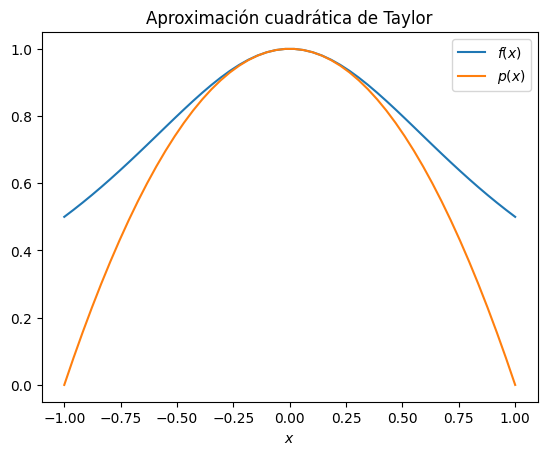

In [16]:
f_numerical = sp.lambdify(x, f, "numpy")
p_numerical = sp.lambdify(x, p, "numpy")

x_numerical = np.linspace(-1, 1)
y_1 = f_numerical(x_numerical)
y_2 = p_numerical(x_numerical)

plt.plot(x_numerical, y_1, label="$f(x)$")
plt.plot(x_numerical, y_2, label="$p(x)$")
plt.title("Aproximación cuadrática de Taylor")
plt.xlabel("$x$")
plt.legend()
plt.show()

## 2. Actividad

Generalice esto produciendo una función que recibe una función $f$ de `sympy`, un número real $x_0$, un natural $n$, y retorna el polinomio de Taylor de $n$-ésimo grado de $f$ en torno a $x_0$

In [17]:
def TaylorPolinomial(f, n, x_0):
    a_0 = f.subs(x, x_0)
    g = f
    A = [a_0]
    for k in range(1, n+1):
        g = sp.diff(g, x)
        A.append(g.subs(x, x_0)/math.factorial(k))

    return sum(A[k]*(x - x_0)**k for k in range(n+1))

In [67]:
f = 1/(1 + x**2)
n = 10
x_0 = 0
p = TaylorPolinomial(f, n, x_0)

p

-x**10 + x**8 - x**6 + x**4 - x**2 + 1

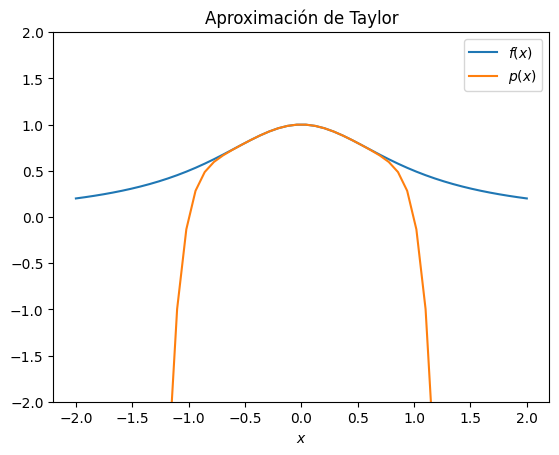

In [68]:
f_numerical = sp.lambdify(x, f, "numpy")
p_numerical = sp.lambdify(x, p, "numpy")

x_numerical = np.linspace(-2, 2)
y_1 = f_numerical(x_numerical)
y_2 = p_numerical(x_numerical)

plt.plot(x_numerical, y_1, label="$f(x)$")
plt.plot(x_numerical, y_2, label="$p(x)$")
plt.title("Aproximación de Taylor")
plt.xlabel("$x$")
plt.ylim(-2, 2)
plt.legend()
plt.show()